In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%env TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf

env: TF_ENABLE_ONEDNN_OPTS=0


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
print(valid_data)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers

# Create DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_4  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               131200    
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 7169349 (27.35 MB)
Trainable params: 131845 (515.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [ ]:
history =model.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[early_stopping])

Epoch 1/20
92/92 [==============================] - 66s 719ms/step - loss: 0.5250 - accuracy: 0.8035 - val_loss: 0.5507 - val_accuracy: 0.7934
Epoch 2/20
92/92 [==============================] - 56s 606ms/step - loss: 0.5232 - accuracy: 0.8014 - val_loss: 0.6017 - val_accuracy: 0.7852
Epoch 3/20
92/92 [==============================] - 61s 659ms/step - loss: 0.5289 - accuracy: 0.8018 - val_loss: 0.5764 - val_accuracy: 0.7975
Epoch 4/20
92/92 [==============================] - 58s 634ms/step - loss: 0.5358 - accuracy: 0.7977 - val_loss: 0.5948 - val_accuracy: 0.7784
Epoch 5/20
92/92 [==============================] - 66s 722ms/step - loss: 0.5155 - accuracy: 0.8110 - val_loss: 0.5662 - val_accuracy: 0.7907
Epoch 6/20
92/92 [==============================] - 56s 603ms/step - loss: 0.5147 - accuracy: 0.8045 - val_loss: 0.5614 - val_accuracy: 0.7962
Epoch 7/20
92/92 [==============================] - 58s 631ms/step - loss: 0.5238 - accuracy: 0.8055 - val_loss: 0.5708 - val_accuracy: 0.7989

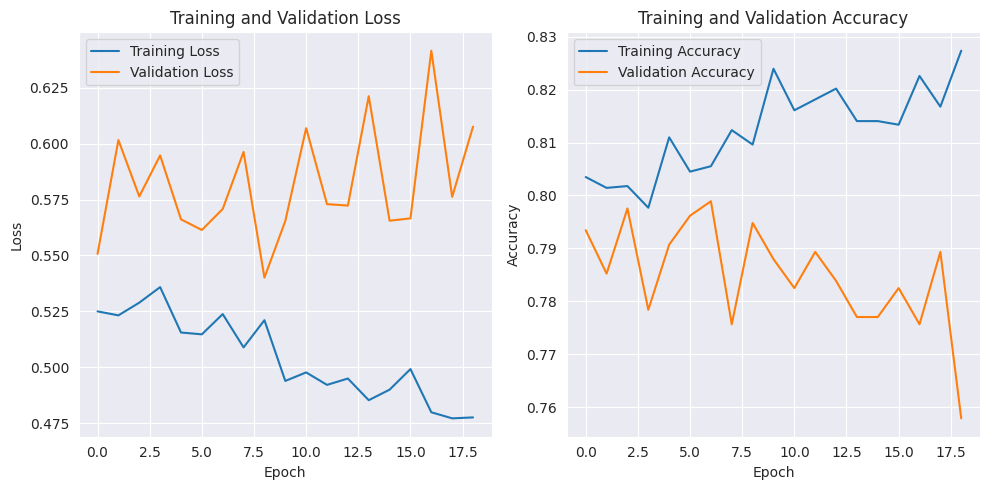

In [ ]:
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# New Section

In [ ]:
pip install scikit-learn


In [ ]:
test_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')


Found 731 images belonging to 5 classes.


In [ ]:
evaluation_result=model.evaluate(test_data,verbose=1)
print("Test loss: ",evaluation_result[0])
print("Test Accuracy: ",evaluation_result[1])

23/23 [==============================] - 12s 515ms/step - loss: 0.5921 - accuracy: 0.7975
Test loss:  0.5921324491500854
Test Accuracy:  0.797537624835968
